Fetching stock data for adobe and microsoft from yahoo finance

In [2]:
import numpy as np
import pandas as pd
import statsmodels
import statsmodels.api as sm
from statsmodels.tsa.stattools import coint, adfuller
import warnings

warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style="whitegrid")


pd.core.common.is_list_like = pd.api.types.is_list_like
from pandas_datareader import data as pdr
import datetime
import yfinance as yf
pdr.get_data_yahoo = pdr.get_data_yahoo
start=datetime.datetime(2010,1,1)
end=datetime.datetime(2019,1,1)
tickers=['ADBE','MSFT']
data=yf.download(tickers,start,end)['Close']
data.tail()

[*********************100%%**********************]  2 of 2 completed


Ticker,ADBE,MSFT
Date,,
2018-12-24,205.160004,94.129997
2018-12-26,222.949997,100.559998
2018-12-27,225.139999,101.180000
2018-12-28,223.130005,100.389999
2018-12-31,226.240005,101.570000


Testing for Stationarity


In [3]:
def stationarity_test(X,cutoff=0.01):
    pvalue=adfuller(X)[1]
    if pvalue < cutoff:
        print('p-value = ' + str(pvalue) + ' The series ' + X.name +' is likely stationary.')
    else:
        print('p-value = ' + str(pvalue) + ' The series ' + X.name +' is likely non-stationary.')

stationarity_test(data['ADBE'])
stationarity_test(data['MSFT'])

p-value = 0.9977073085901503 The series ADBE is likely non-stationary.
p-value = 0.9977171097622959 The series MSFT is likely non-stationary.


Testing whether the stocks are cointegerated


In [4]:
score,pvalue,_= coint(data['ADBE'],data['MSFT'])
print('Cointegration test p-value: ' + str(pvalue))

Cointegration test p-value: 0.011581363102776309


Calculating features such as Moving averages, Rate of change,standard deviation and Lag features


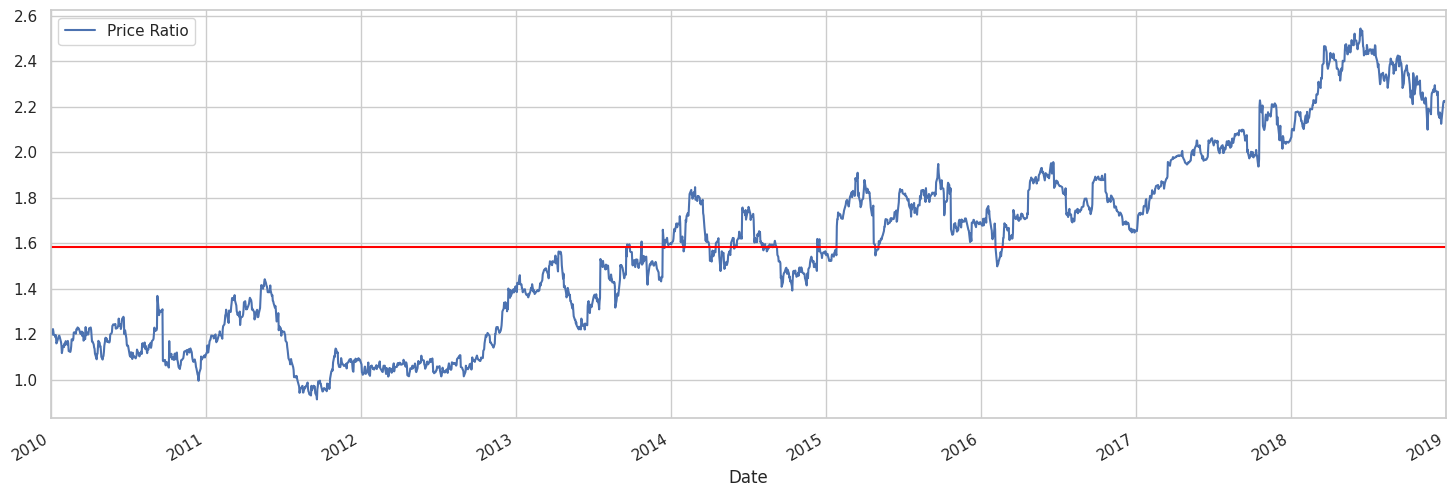

In [5]:
price_ratio=data['ADBE']/data['MSFT']
price_ratio.plot(figsize=(18,6))
plt.axhline(price_ratio.mean(), color='red')
plt.xlim('2010-01-01', '2019-01-01')
plt.legend(['Price Ratio']);

In [6]:
""" Using a 80/20 split to train and test the model """
split=int(len(price_ratio)*0.8)
print(split)
train_data_ratios =price_ratio[:split]
test_data_ratios =price_ratio[split:]
ratios_mavg5 = train_data_ratios.rolling(window=5, center=False).mean()
ratios_mavg5_test = test_data_ratios.rolling(window=5, center=False).mean()
ratios_mavg_30=price_ratio.rolling(window=30, center=False).mean()
ratios_mavg60 = train_data_ratios.rolling(window=60, center=False).mean()
ratios_mavg60_test = test_data_ratios.rolling(window=60, center=False).mean()
std_60 = train_data_ratios.rolling(window=60, center=False).std()
std_60_test = test_data_ratios.rolling(window=60, center=False).std()
zscore_60_5 = (ratios_mavg5 - ratios_mavg60)/std_60
zscore_60_5_test = (ratios_mavg5_test - ratios_mavg60_test)/std_60_test


1811


Plotting the Moving averages and Z score



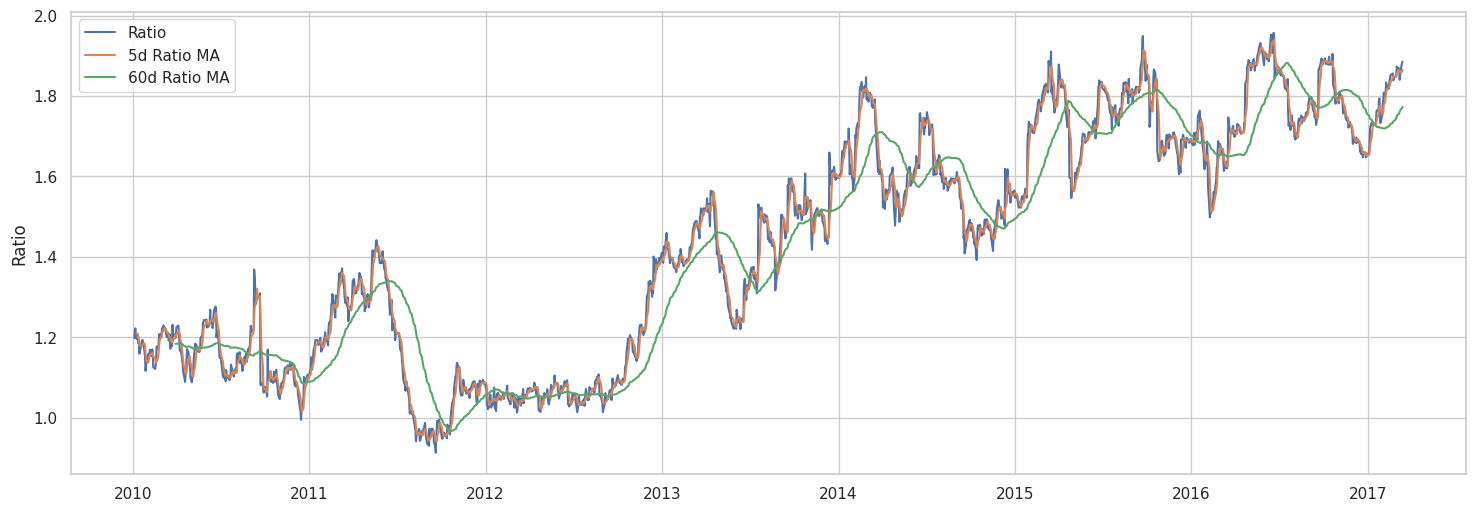

In [7]:
plt.figure(figsize=(18, 6))
plt.plot(train_data_ratios.index, train_data_ratios.values)
plt.plot(ratios_mavg5.index, ratios_mavg5.values)
plt.plot(ratios_mavg60.index, ratios_mavg60.values)
plt.legend(['Ratio', '5d Ratio MA', '60d Ratio MA'])

plt.ylabel('Ratio')
plt.show()

Calculating and printing the Rate of Change


In [44]:
!pip install arbitragelab

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.1/50.1 kB 4.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 267.0/267.0 kB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 918.2/918.2 kB 23.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 47.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 58.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.3/10.3 MB 91.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 62.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 85.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 532.6/532.6 kB 30.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 70.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 92.1 MB/s eta 0:00:00
   ━━━━━━

Here abritragelab is used to calculate the half life mean reversion of the price ratio.


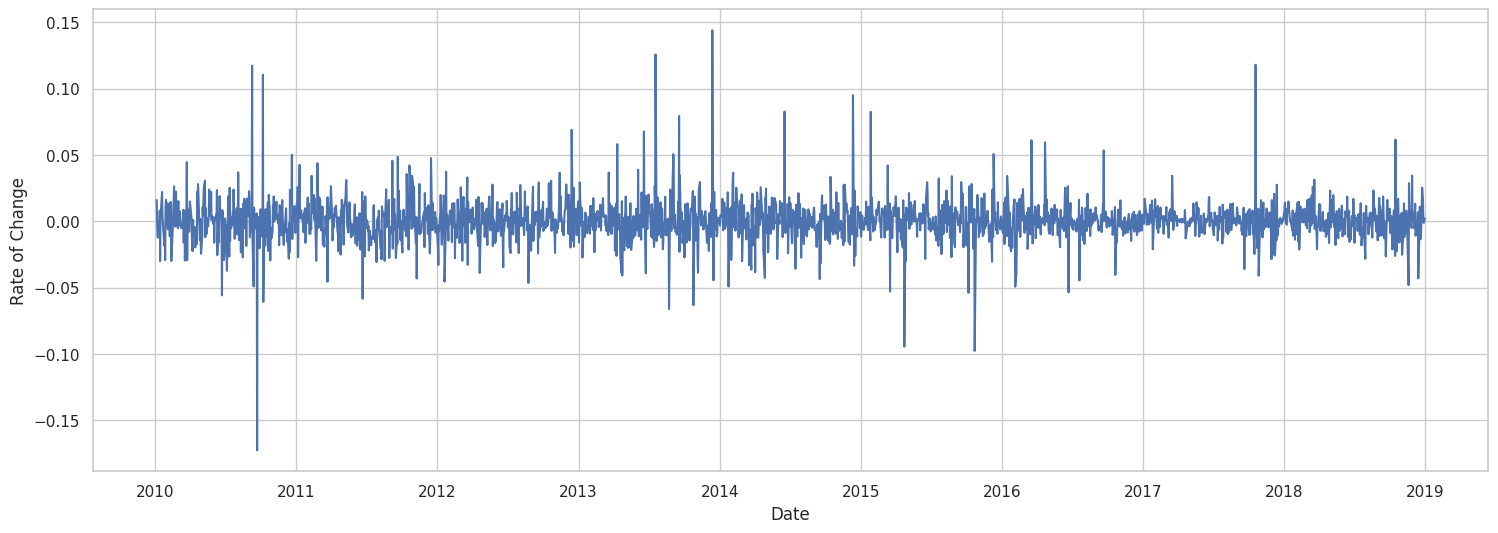

In [12]:
import arbitragelab.cointegration_approach.utils as utils
ROC= price_ratio.diff()/price_ratio.shift(1)
plt.figure(figsize=(18, 6))
plt.plot(ROC.index, ROC.values)
plt.ylabel('Rate of Change')
plt.xlabel('Date')
plt.show()

half_life= utils.get_half_life_of_mean_reversion(price_ratio)
features=pd.DataFrame({'ratio':price_ratio,'ratio_mavg5':ratios_mavg5,'ratio_mavg30':ratios_mavg_30,'ratio_mavg60':ratios_mavg60,'std_60':std_60,'zscore_60_5':zscore_60_5,'ROC':ROC.values,'halflife':half_life})
features=features.dropna()




Training a Random Forest Regressor model to predict futre price ratios


In [13]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

regressor=RandomForestRegressor(n_estimators=20,random_state=0,oob_score=True)
trainer=features[['ratio','ratio_mavg5','ratio_mavg30','ratio_mavg60','std_60','ROC','halflife']]
future=price_ratio[features.index]
data_train, data_test, future_train,future_test=train_test_split(trainer,future,test_size=0.2,random_state=42)




regressor.fit(data_train,future_train)

RandomForestRegressor(n_estimators=20, oob_score=True, random_state=0)

Testing the Random Forest Regressor model



In [14]:
from sklearn.metrics import mean_squared_error,r2_score
oob_score=regressor.oob_score_
print(oob_score)
predictions = regressor.predict(data_test)
mse=mean_squared_error(future_test,predictions)
print(mse)
r2=r2_score(future_test,predictions)
print(r2)


0.9999778614056887
8.374996598539186e-07
0.9999901245741246


Defining a function to implement pairs trading strategy



In [20]:
def pair_trade(stock1,stock2,features,regressor,threshold=0.04):
    price_ratio=stock1/stock2
    data_new=features[['ratio','ratio_mavg5','ratio_mavg30','ratio_mavg60','std_60','ROC','halflife']]
    data_new=data_new.dropna()

    future_predictions=regressor.predict(data_new)[0]
    if(future_predictions>price_ratio.iloc[-1]+threshold ):
      signal=1
    elif(future_predictions<price_ratio.iloc[-1]-threshold ):
      signal=-1

    else:
      signal=0
    return signal



Backtesting the Pairs trading strategy


147.0898492701755


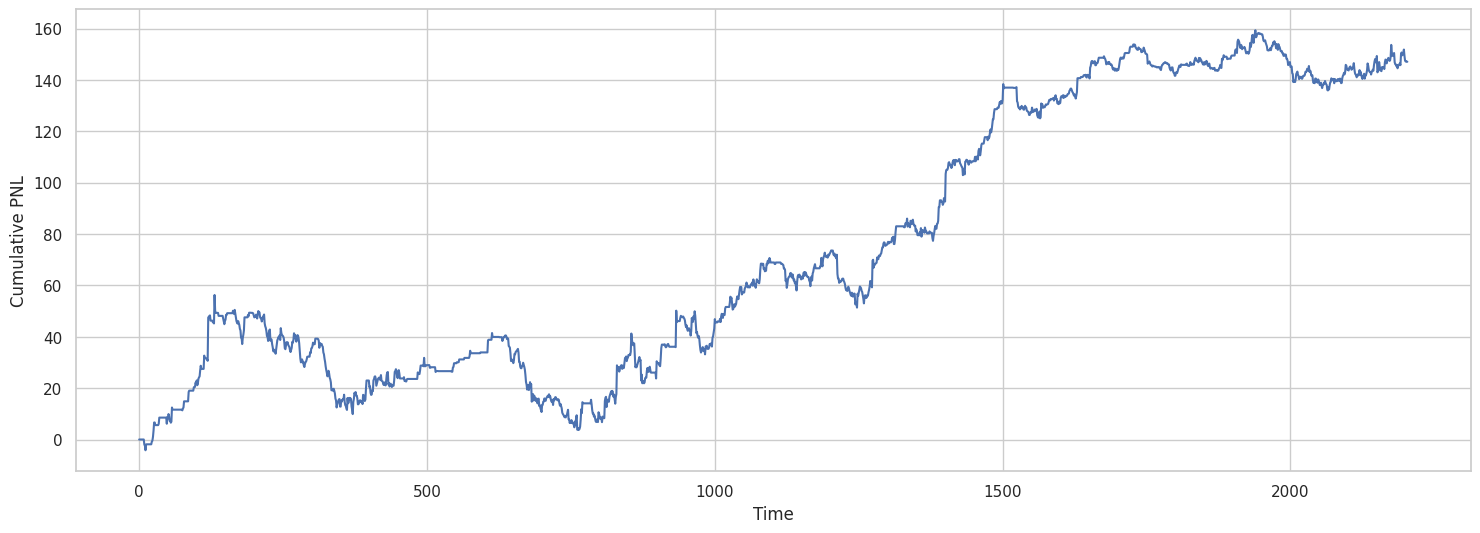

In [21]:
signals=[]
pnl=[]
for i in range(60,len(data)):
  adbe=data['ADBE'].iloc[i-60:i]
  msft=data['MSFT'].iloc[i-60:i]
  features = pd.DataFrame({
        'ratio': adbe / msft,
        'ratio_mavg5': (adbe / msft).rolling(window=5).mean().iloc[-1],
        'ratio_mavg30': (adbe / msft).rolling(window=30).mean().iloc[-1],

        'ratio_mavg60': (adbe / msft).rolling(window=60).mean().iloc[-1],
        'std_60': (adbe / msft).rolling(window=60).std().iloc[-1],
        'ROC':(adbe/msft).diff()/(adbe/msft).shift(1).iloc[-1],
        'halflife': utils.get_half_life_of_mean_reversion(adbe/msft)})



  signal=pair_trade(adbe,msft,features,regressor)
  signals.append(signal)
  radb=data['ADBE'].pct_change().shift(-1).iloc[i]
  rmsft=data['MSFT'].pct_change().shift(-1).iloc[i]
  if np.isnan(radb) or np.isnan(rmsft):
        pnl.append(0)
  else:

        daily_pnl = signal * (radb - rmsft)*100
        pnl.append(daily_pnl)
netpnl=np.cumsum(pnl)
print(netpnl[-1])
plt.figure(figsize=(18,6))
plt.plot(netpnl,label='Cumulative PNL')
plt.xlabel('Time')
plt.ylabel('Cumulative PNL')

plt.show()


